In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
from dateutil.parser import parse

/tmp/ipykernel_76434/953808513.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df = pd.read_csv("data.csv")
df.head(10)

,Date,MQ135,MQ7
0,2010-07-04,129,822
1,2010-07-05,130,822
2,2010-07-06,129,822
3,2010-07-07,128,823
4,2010-07-08,129,820
5,2010-07-09,129,818
6,2010-07-10,128,834
7,2010-07-11,129,837
8,2010-07-12,128,814
9,2010-07-13,128,828


In [3]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

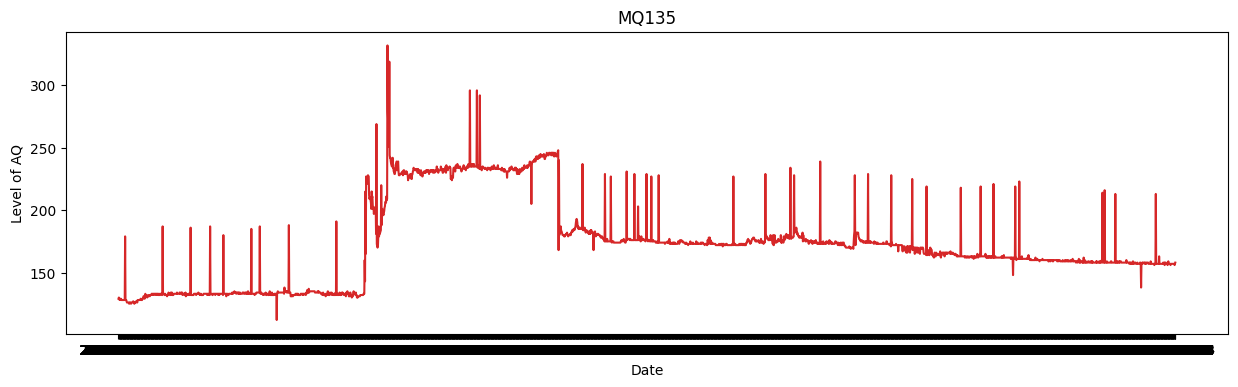

In [4]:
plot_df(df, df["Date"], df["MQ135"], "MQ135", ylabel="Level of AQ")

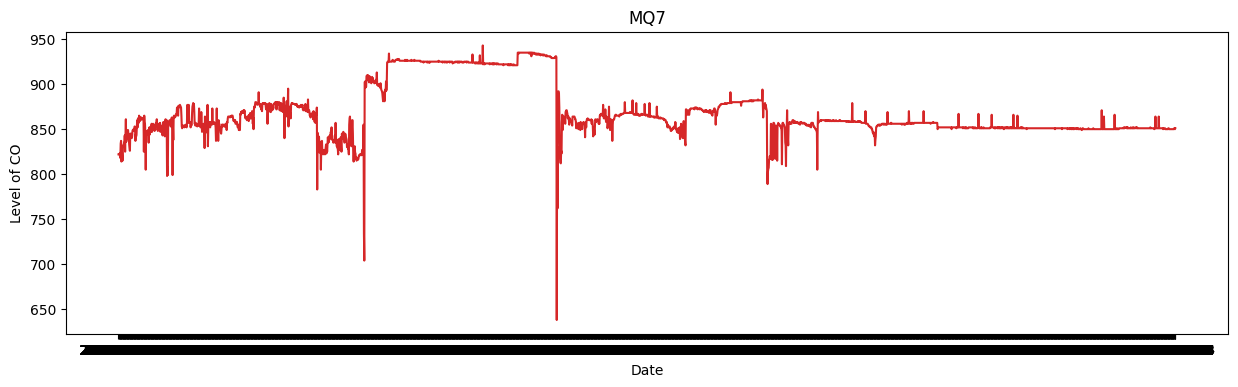

In [5]:
plot_df(df, df["Date"], df["MQ7"], "MQ7", ylabel="Level of CO")

In [6]:
x = df['Date'].values
y1 = df['MQ135'].values
y2 = df['MQ7'].values

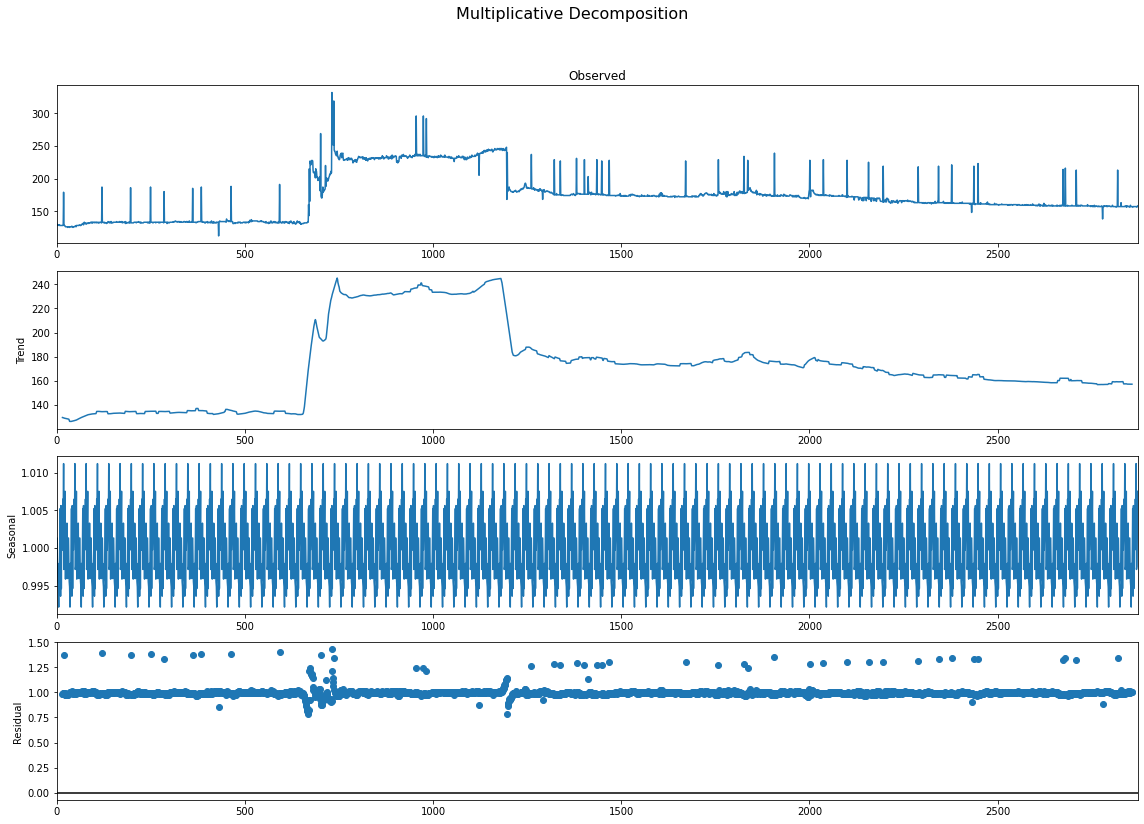

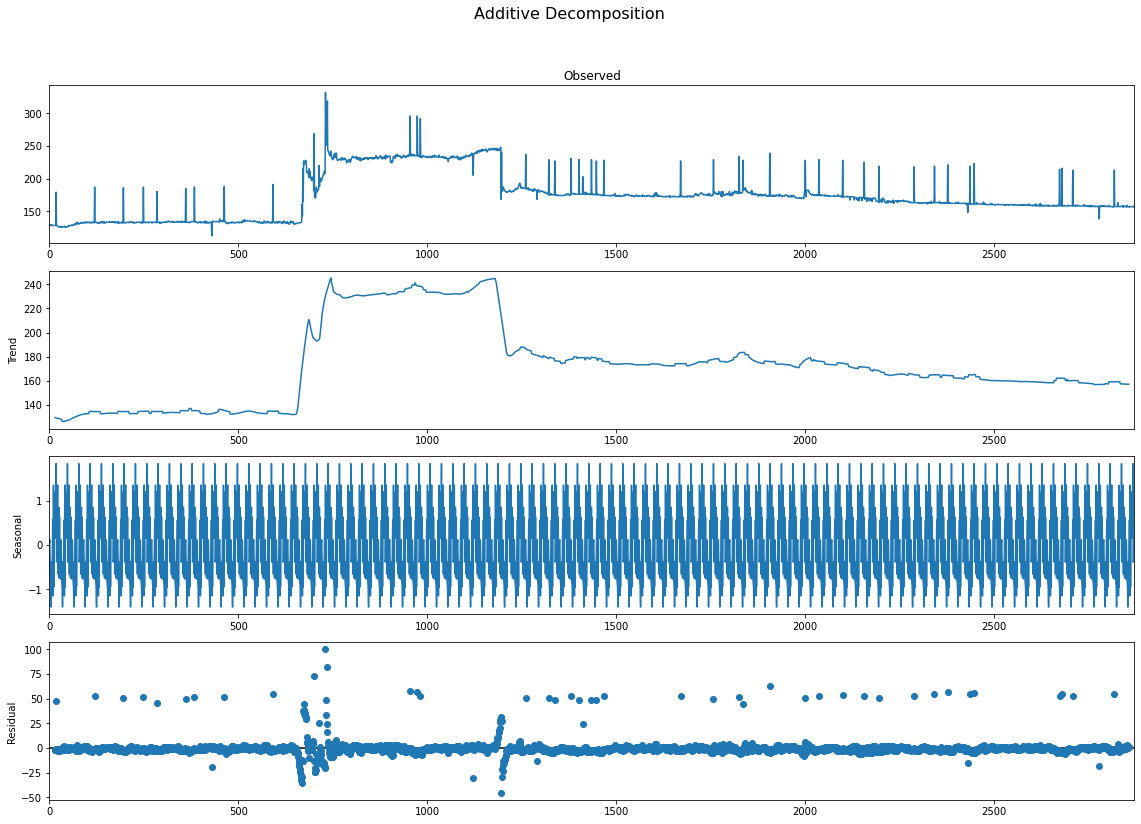

In [7]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(y1, model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(y1, model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

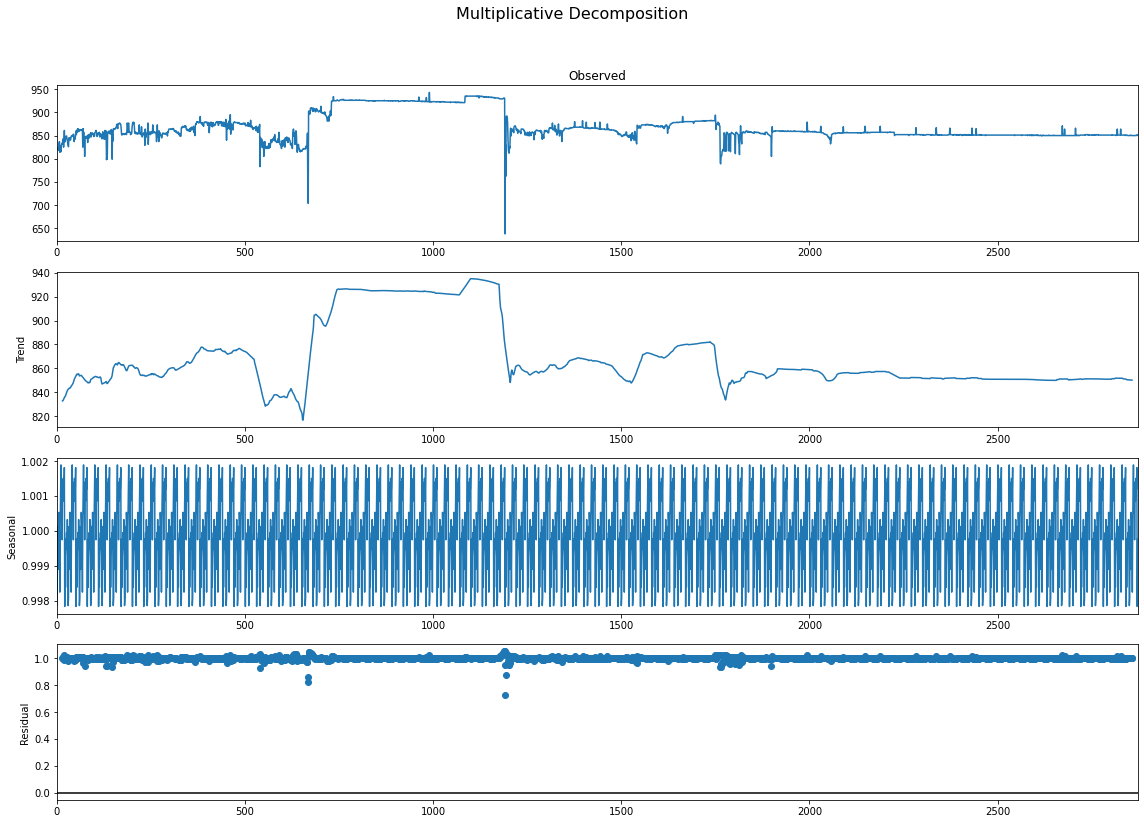

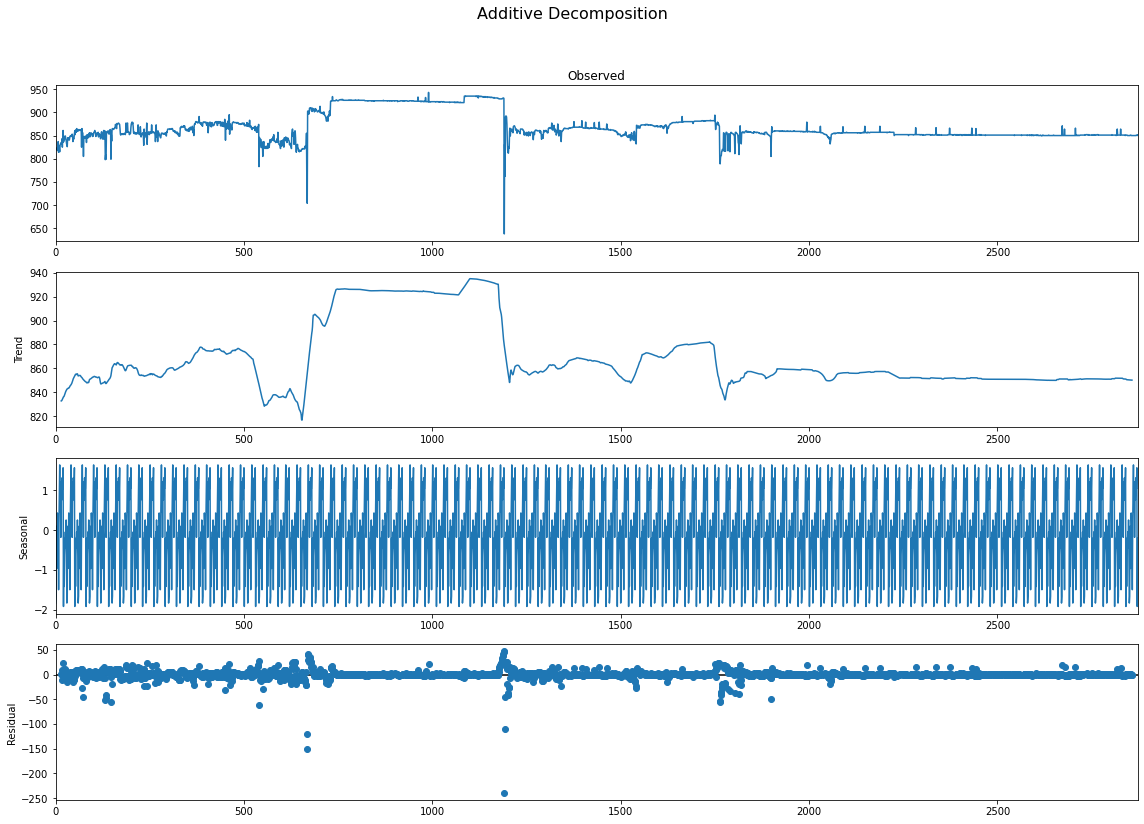

In [8]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(y2, model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(y2, model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

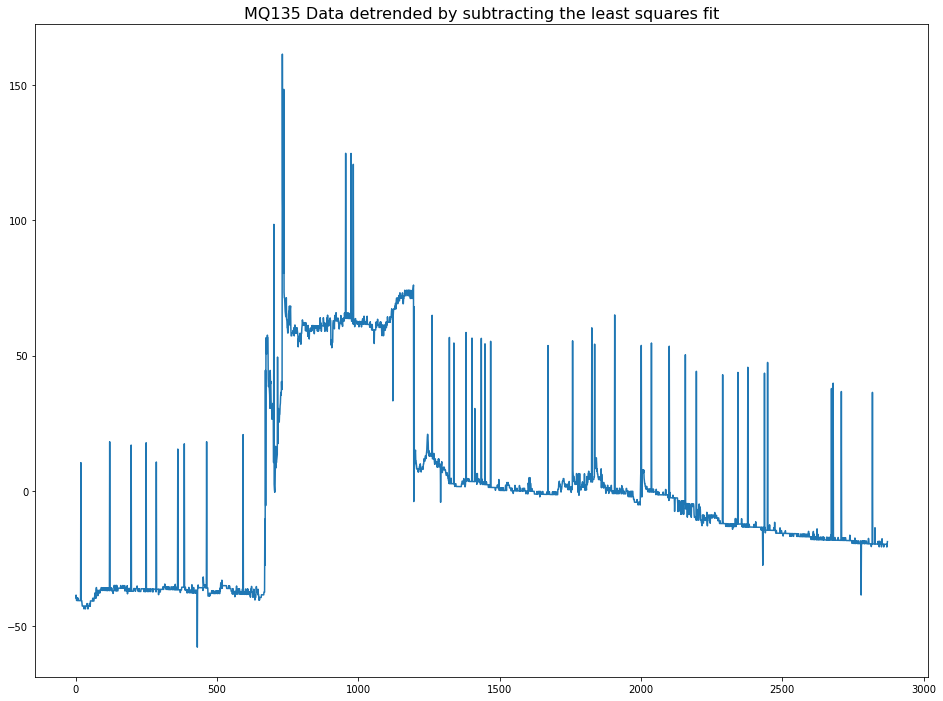

In [9]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(y1)
plt.plot(detrended)
plt.title('MQ135 Data detrended by subtracting the least squares fit', fontsize=16)
plt.show()

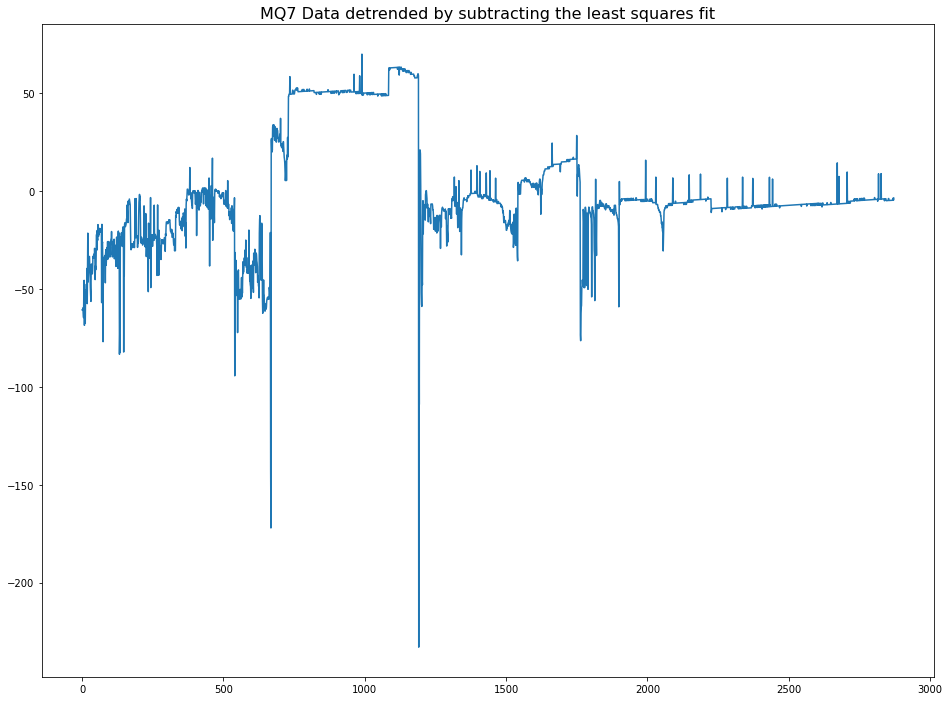

In [10]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(y2)
plt.plot(detrended)
plt.title('MQ7 Data detrended by subtracting the least squares fit', fontsize=16)
plt.show()

In [11]:
# fit model
model = ARIMA(df["MQ135"][:2000], order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit(disp=0)
model_fit.summary()

/home/maina/PycharmProjects/Firebase/venv/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  MQ135   No. Observations:                 2000
Model:                     ARMA(1, 1)   Log Likelihood               -7168.126
Method:                       css-mle   S.D. of innovations              8.708
Date:                Tue, 10 Aug 2021   AIC                          14344.252
Time:                        05:14:42   BIC                          14366.656
Sample:                             0   HQIC                         14352.478
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         169.8220     19.701      8.620      0.000     131.208     208.436
ar.L1.MQ135     0.9973      0.002    661.173      0.000       0.994       1.000
ma.L1.MQ135    -0.6812      0.016    -42.987      0.000      -0.712      -0.650
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0027           +0.0000j            1.0027            0.0000
MA.1            1.4679           +0.0000j            1.4679            0.0000
-----------------------------------------------------------------------------
"""

In [12]:
# predict
start_index = df["Date"][2000]
end_index = df["Date"][2060]
print(start_index)
forecast = model_fit.predict(start=start_index, end=end_index)

2015-12-25


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
# visualization
plt.figure(figsize=(22,10))
plt.plot(df["Date"],y1,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()